In [2]:
import os, shutil
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
original_dataset_dir = '/Users/fnakstad/Dev/Datasets/kagglecatsanddogs/train'
base_dir = '/Users/fnakstad/Dev/Datasets/processed/cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print len(os.listdir(train_cats_dir))
print len(os.listdir(train_dogs_dir))
print len(os.listdir(validation_cats_dir))
print len(os.listdir(validation_dogs_dir))
print len(os.listdir(test_cats_dir))
print len(os.listdir(test_dogs_dir))

1000
1000
500
500
500
500


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

('data batch shape:', (20, 150, 150, 3))
('labels batch shape', (20,))


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 149s 1s/step - loss: 0.6871 - acc: 0.5485 - val_loss: 0.6638 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 142s 1s/step - loss: 0.6539 - acc: 0.5940 - val_loss: 0.6363 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 141s 1s/step - loss: 0.6048 - acc: 0.6570 - val_loss: 0.6595 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 141s 1s/step - loss: 0.5713 - acc: 0.7045 - val_loss: 0.6028 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 142s 1s/step - loss: 0.5413 - acc: 0.7170 - val_loss: 0.6014 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 141s 1s/step - loss: 0.5214 - acc: 0.7405 - val_loss: 0.5792 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 141s 1s/step - loss: 0.4935 - acc: 0.7605 - val_loss: 0.5866 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 139s 1s/step - 

In [13]:
model.save('cats_and_dogs_small_1.h5')

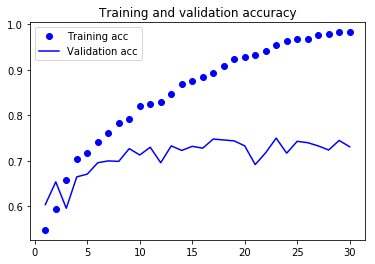

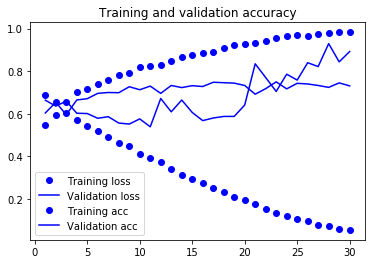

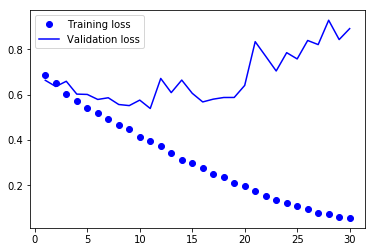

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

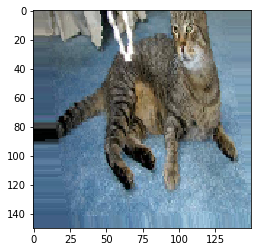

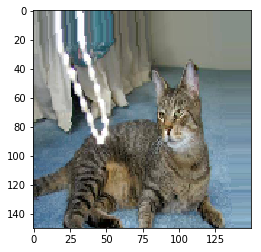

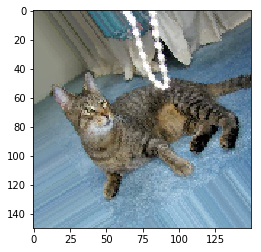

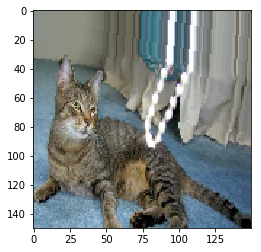

In [20]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 241s 2s/step - loss: 0.5634 - acc: 0.7025 - val_loss: 0.5307 - val_acc: 0.7265
Epoch 2/100
100/100 [==============================] - 251s 3s/step - loss: 0.5755 - acc: 0.6984 - val_loss: 0.5713 - val_acc: 0.7030
Epoch 3/100
100/100 [==============================] - 232s 2s/step - loss: 0.5683 - acc: 0.7003 - val_loss: 0.5875 - val_acc: 0.6834
Epoch 4/100
100/100 [==============================] - 292s 3s/step - loss: 0.5645 - acc: 0.6966 - val_loss: 0.5182 - val_acc: 0.7411
Epoch 5/100
100/100 [==============================] - 243s 2s/step - loss: 0.5516 - acc: 0.7091 - val_loss: 0.5372 - val_acc: 0.7214
Epoch 6/100
100/100 [==============================] - 241s 2s/step - loss: 0.5486 - acc: 0.7069 - val_loss: 0.5171 - val_acc: 0.7291
Epoch 7/100
100/100 [==============================] - 237s 2s/step - loss: 0.5417 - acc: 0.7206 - val_loss: 0.5

In [26]:
model.save('cats_and_dogs_small_2.h5')

In [27]:
from keras.applications import VGG16

In [28]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 14s 0us/step


In [29]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [32]:
# Extracting features using pretrained conv base

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5943 - acc: 0.6630 - val_loss: 0.4346 - val_acc: 0.8370
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4222 - acc: 0.8105 - val_loss: 0.3737 - val_acc: 0.8350
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3509 - acc: 0.8595 - val_loss: 0.3173 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3181 - acc: 0.8635 - val_loss: 0.3030 - val_acc: 0.8700
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2806 - acc: 0.8915 - val_loss: 0.2815 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2678 - acc: 0.8850 - val_loss: 0.2754 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2498 - acc: 0.9000 - val_loss: 0.2632 - val_acc: 0.9000
Epoch 8/30
200

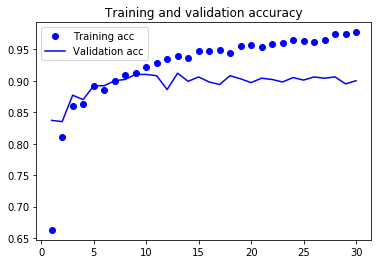

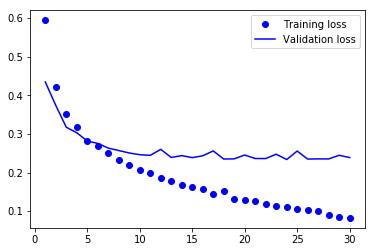

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [6]:
history = pickle.load(open("history.pkl", "rb"))

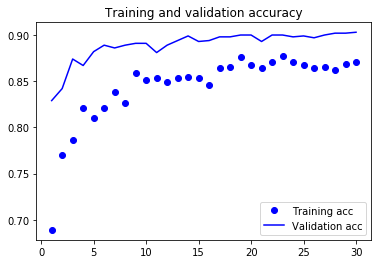

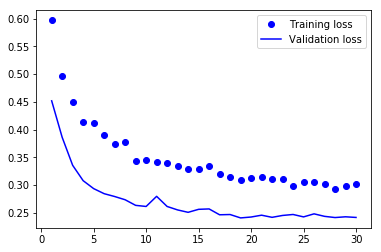

In [8]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [9]:
from keras.models import load_model
model = load_model('cats_and_dogs_3.hdf5')

/Users/fnakstad/Dev/Sandbox/keras-test/venv/lib/python2.7/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

NameError: name 'test_dir' is not defined

In [15]:
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
img_path = '/Users/fnakstad/Dev/Datasets/processed/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


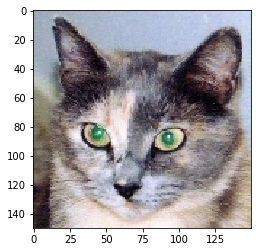

In [17]:
plt.imshow(img_tensor[0])
plt.show()

In [18]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [19]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


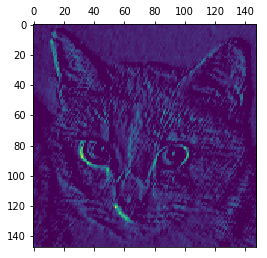

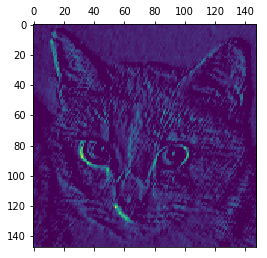

In [23]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

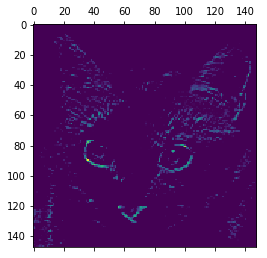

In [28]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

In [34]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
